<br>

<br>

# 🌊 **ACEA SMART WATER ANALYTICS** 🌊


**ANALYZING THE RELATIONSHIP OF PRECIPITATION TO BILANCINO LAKE'S WATER LEVEL**

**TIMES SERIES**

<br>

# **INDEX**

- **STEP 1: PROBLEM DEFINITION**
- **STEP 2: DATA COLLECTION**
- **STEP 3: DATA EXPLORATION & PREPROCESSING**
- **STEP 4: EXPLORATORY DATA ANALYSIS (EDA)** 






- **STEP 3: DATA EXPLORATION & CLEANING**
- **STEP 4: FEATURE ENGINEERING & SELECTION**
- **STEP 5: MODEL SELECTION & IMPLEMENTATION**
- **STEP 6: MODEL EVALUATION & INTERPRETATION**
- **STEP 7: VISUALIZATION & INSIGHTS**
- **STEP 8: CONCLUSION & RECOMMENDATIONS**

<br>

<br>

---

<br>

<div style="text-align: justify;">

</div>

# **STEP 1: PROBLEM DEFINITION**

<br>



**Understanding the Problem:**

<div style="text-align: justify;">

Water resource management is crucial for environmental **sustainability, agriculture**, and **urban planning**. The **Lake Bilancino** dataset provides historical data on lake levels and various meteorological factors. The primary goal is to analyze the relationship between precipitation levels and lake water levels over time.


**Research Question:**

How does precipitation impact the water level of **Lake Bilancino**?

Hypothesis:

<div style="text-align: justify;">

An increase in precipitation will lead to a **rise** in the lake's water level, while periods of low precipitation may correspond to a **drop** in water levels.
</div>

**Key Variables:**

- **Dependent Variable:** `Lake_Level` (Water level of the lake).
- **Independent Variable:** `Precipitation` (Rainfall amount over time).
- **Other Potential Influencing Factors:** Temperature, humidity, drainage volumes, and seasonal patterns.

**Target Variable**
- `Lake_Level`

**Scope of the Analysis:**
<div style="text-align: justify;">

This project will focus on identifying correlations and trends between precipitation and lake levels using time-series data. The insights gained could be valuable for:
</div>

- Water conservation strategies.
- Predicting potential droughts or overflows.
- Enhancing decision-making in water resource management.

<br>

---

<br>

<br>

# **STEP 2: DATA COLLECTION**

- 2.1. Library Importing
- 2.2. Data Collection

<br>

**2.1. LIBRARY IMPORTING**

In [ ]:
import os
import pandas as pd
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf






import warnings
warnings.filterwarnings('ignore')


<br>

**2.2. DATA COLLECTION**

In [2]:
zip_path = "data/acea-water-prediction.zip"

extract_to = os.getcwd()

with zipfile.ZipFile(zip_path, "r") as zip_ref:
    if "Lake_Bilancino.csv" in zip_ref.namelist():
        zip_ref.extract("Lake_Bilancino.csv", extract_to)
        print(f"'Lake_Bilancino.csv' extraído ")
    else:
        print("El archivo 'Lake_Bilancino.csv' no se encontró en el ZIP.")


'Lake_Bilancino.csv' extraído 


In [3]:
pd.options.display.max_columns=None
df = pd.read_csv("Lake_Bilancino.csv")
df.head()

,Date,Rainfall_S_Piero,Rainfall_Mangona,Rainfall_S_Agata,Rainfall_Cavallina,Rainfall_Le_Croci,Temperature_Le_Croci,Lake_Level,Flow_Rate
0,03/06/2002,NaN,NaN,NaN,NaN,NaN,NaN,249.43,0.31
1,04/06/2002,NaN,NaN,NaN,NaN,NaN,NaN,249.43,0.31
2,05/06/2002,NaN,NaN,NaN,NaN,NaN,NaN,249.43,0.31
3,06/06/2002,NaN,NaN,NaN,NaN,NaN,NaN,249.43,0.31
4,07/06/2002,NaN,NaN,NaN,NaN,NaN,NaN,249.44,0.31


<br>

---

<br>

<br>

# **STEP 3: DATA EXPLORATION & PREPROCESSING**


- 2.1. Exploration: Understanding the Features
- 2.2. Identifying null values in each feature
- 2.3. Eliminating Duplicates
- 2.4. Eliminating Irrelevant Information

<br>

<br>

**2.1. EXPLORATION: UNDERSTANDING THE FEATURES**

The **Lake Bilancino dataset**, contains hydrological and meteorological data relevant for time-series analysis.

**Key Features of the Dataset:**
- **`Date`**: Timestamp of recorded observations.
- **`Rainfall_S_Piero`**: Precipitation measured at the San Piero station.
- **`Rainfall_Mangona`**: Precipitation recorded at the Mangona station.
- **`Rainfall_S_Agata`**: Precipitation at the Sant'Agata station.
- **`Rainfall_Cavallina`**: Precipitation at the Cavallina station.
- **`Rainfall_Le_Croci`**: Precipitation at the Le Croci station.
- **`Temperature_Le_Croci`**: Temperature recorded at the Le Croci station.
- **`Lake_Level`**: Bilancino Lake level, measured in meters.
- **`Flow_Rate`**: Lake outflow rate, measured in cubic meters per second.

**Feature Description:** 

- **Precipitation (Rainfall):**
These variables represent the amount of **rainfall recorded at different stations** around **Lake Bilancino**. Rainfall **directly impacts** the lake level and outflow rate, as rainwater contributes to the **total volume** of the lake.

- **Temperature (Temperature_Le_Croci):**
Temperature can affect **water evaporation** from the lake, influencing its level. Additionally, extreme temperatures may **impact water demand** and the **lake's ecosystem.**

- **Lake Level (Lake_Level):**
Indicates the **height of the water** in **Lake Bilancino**. This is a **key indicator** for **water resource management**, as **extremely high or low levels** can have **environmental and operational consequences**.

- **Flow Rate (Flow_Rate):**
Measures the **amount of water leaving the lake per unit of time**. This is crucial for understanding **lake dynamics** and planning **water distribution** to surrounding areas.




**Exploratory Analysis of the Features:**

When analyzing these features, it is important to **assess correlations** between them. For example:

- Investigating **how precipitation variations impact lake levels and flow rates.**
- Identifying **seasonal trends** and long-term patterns in the data.

Additionally, handling missing values and detecting anomalies is crucial to ensure data accuracy for further analysis. Data visualization techniques, such as time-series line plots and scatter plots, can help better understand the dynamics of Lake Bilancino.

This exploratory feature analysis will provide a solid foundation for modeling and predicting the lake’s behavior, which is essential for efficient water resource management in the region.

In [4]:
print("Dataset dimensions:")
print(df.shape)

Dataset dimensions:
(6603, 9)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6603 entries, 0 to 6602
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  6603 non-null   object 
 1   Rainfall_S_Piero      6026 non-null   float64
 2   Rainfall_Mangona      6026 non-null   float64
 3   Rainfall_S_Agata      6026 non-null   float64
 4   Rainfall_Cavallina    6026 non-null   float64
 5   Rainfall_Le_Croci     6026 non-null   float64
 6   Temperature_Le_Croci  6025 non-null   float64
 7   Lake_Level            6603 non-null   float64
 8   Flow_Rate             6582 non-null   float64
dtypes: float64(8), object(1)
memory usage: 464.4+ KB


**Data Structure**
- **Type:** pandas DataFrame  
- **Shape:** (6603, 9)  
- **Memory Usage:** 464.4 KB  

**Column Information**  
- **Total Columns:** 9  
- **Data Types:**  
  - `float64`: 8 columns  
  - `object`: 1 column  

**Index**  
- **RangeIndex:** 0 to 6602  
- This means the DataFrame contains **6,603 rows**, numbered from **0 to 6602**. Each row represents a single data point or observation.  


In [6]:
print("Data types present in the dataset:", df.dtypes.unique())

numerical_vars = df.select_dtypes(include=['float', 'int']).columns
categorical_vars = df.select_dtypes(include=['O']).columns

num_numerical_vars = len(numerical_vars)
num_categorical_vars = len(categorical_vars)

print(f"Number of categorical variables: {num_categorical_vars}")
print("Categorical variables:", list(categorical_vars))
print('\n')
print(f"Number of numerical variables: {num_numerical_vars}")
print("Numerical variables:", list(numerical_vars))

Data types present in the dataset: [dtype('O') dtype('float64')]
Number of categorical variables: 1
Categorical variables: ['Date']


Number of numerical variables: 8
Numerical variables: ['Rainfall_S_Piero', 'Rainfall_Mangona', 'Rainfall_S_Agata', 'Rainfall_Cavallina', 'Rainfall_Le_Croci', 'Temperature_Le_Croci', 'Lake_Level', 'Flow_Rate']


**Data Type Report**

**Data Types Present in the Dataset**
- `[dtype('O') dtype('float64')]`

**CATEGORICAL VARIABLES**
- **Number of Categorical Variables:** 1  
- **Categorical Variables:** `'Date'`  

**NUMERICAL VARIABLES**
- **Number of Numerical Variables:** 8  
- **Numerical Variables:**  
  - `Rainfall_S_Piero`  
  - `Rainfall_Mangona`  
  - `Rainfall_S_Agata`  
  - `Rainfall_Cavallina`  
  - `Rainfall_Le_Croci`  
  - `Temperature_Le_Croci`  
  - `Lake_Level`  
  - `Flow_Rate`  


<br>

**2.2. IDENTIFYING NULL VALUES IN EACH FEATURE**

In [7]:
df.isnull().sum()

Date                      0
Rainfall_S_Piero        577
Rainfall_Mangona        577
Rainfall_S_Agata        577
Rainfall_Cavallina      577
Rainfall_Le_Croci       577
Temperature_Le_Croci    578
Lake_Level                0
Flow_Rate                21
dtype: int64

**MISSING VALUES REPORT**

**Identifying Null Values in Each Feature**
The dataset contains missing values in multiple features. Below is the breakdown of the null values found in each column:

| **Feature**               | **Missing Values** |
|---------------------------|-------------------|
| `Date`                    | 0                 |
| `Rainfall_S_Piero`        | 577               |
| `Rainfall_Mangona`        | 577               |
| `Rainfall_S_Agata`        | 577               |
| `Rainfall_Cavallina`      | 577               |
| `Rainfall_Le_Croci`       | 577               |
| `Temperature_Le_Croci`    | 578               |
| `Lake_Level`              | 0                 |
| `Flow_Rate`               | 21                |

**Observations:**
- The **precipitation-related features** (`Rainfall_S_Piero`, `Rainfall_Mangona`, `Rainfall_S_Agata`, `Rainfall_Cavallina`, `Rainfall_Le_Croci`) all have **577 missing values**.
- The **temperature feature** (`Temperature_Le_Croci`) has **578 missing values**.
- The **flow rate feature** (`Flow_Rate`) has **21 missing values**.
- The **lake level feature (`Lake_Level`) and date column (`Date`) have no missing values**, making them the most complete features.

**Next Steps:**
- Consider **imputation strategies** for missing values, such as mean, median, or forward-fill methods.
- Explore **patterns in missing values** (e.g., specific time periods missing).
- Determine whether missing values need to be **removed or interpolated** based on data trends.


<br>

**2.3. ELIMINATING DUPLICATES**

In [8]:
initial_row_count = df.shape[0]

num_duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")

if num_duplicates > 0:
    df = df.drop_duplicates()
    print(f"Duplicate rows have been removed. Row count reduced from {initial_row_count} to {df.shape[0]}.")
else:
    print("No duplicate rows found.")

Number of duplicate rows: 0
No duplicate rows found.


<br>

**2.4. HANDLING MISSING VALUES IN THE DATASET**

Since the goal of this project is to analyze the correlation between **precipitation** and **lake level (`Lake_Level`)**, it is essential to handle missing values properly. 

Ignoring missing values could lead to **biased** or **inaccurate** conclusions. Properly handling them ensures that the dataset remains **usable** for further analysis.


In [9]:
# Handling missing values in precipitation and temperature using forward-fill (time-series assumption)
df[['Rainfall_S_Piero', 'Rainfall_Mangona', 'Rainfall_S_Agata', 
    'Rainfall_Cavallina', 'Rainfall_Le_Croci', 'Temperature_Le_Croci']] = df[[
    'Rainfall_S_Piero', 'Rainfall_Mangona', 'Rainfall_S_Agata', 
    'Rainfall_Cavallina', 'Rainfall_Le_Croci', 'Temperature_Le_Croci'
]].fillna(method='ffill')

# Handling missing values in 'Flow_Rate' using backward-fill (ensures consistency in recent data)
df['Flow_Rate'] = df['Flow_Rate'].fillna(method='bfill')

# Confirming no missing values remain
print(df.isnull().sum())


Date                      0
Rainfall_S_Piero        577
Rainfall_Mangona        577
Rainfall_S_Agata        577
Rainfall_Cavallina      577
Rainfall_Le_Croci       577
Temperature_Le_Croci    578
Lake_Level                0
Flow_Rate                 0
dtype: int64


**Explanation of Missing Value Handling** 

From the results, it is evident that the missing value handling process was only partially successful. The `Flow_Rate` column was successfully filled, while all other columns related to rainfall and temperature still have missing values.

**Why did Flow_Rate work?**

- **Few Missing Values**: `Flow_Rate` originally had only 21 missing values, which is a relatively small number compared to the 577-578 missing values in the other columns. This made it more likely that the `bfill` method (backward fill) could replace all missing values effectively.

**Why didn't it work for the other columns?**

The forward-fill method (`fillna(method='ffill'`)) applied to the rainfall and temperature columns did not remove all missing values. This could be due to:

1. Missing values at the start of the dataset – If the first rows contain NaNs, there is no previous value to forward-fill them.
2. An incorrect assignment operation – The way the fill operation was assigned might not have updated the DataFrame properly.

**Next Steps**
- We will re-evaluate the handling of missing values in `precipitation` and `temperature` data and explore alternative strategies later


<br>

---

<br>

<br>

# **STEP 4: EXPLORATORY DATA ANALYSIS (EDA)**

- 4.1. Convert Date Column to Datetime format.
- 4.2. Handling missing values using Interpolation and Fill methods.
- 4.3. Visualize Time-Series trends.
- 4.4. Check for Stationarity.
- 4.5. Analyze correlations between Features.
- 4.6. Identify Seasonality and Cyclic patterns.
- 4.7. Detect and handle Outliers
- 4.8. Explore Lag effects.


<br>

**4.1. CONVERT DATA COLUMN TO DATATIME FORMAT**

Ensure the `Date` column is in datetime format for proper **time-series analysis**.

In [10]:
# Convert 'Date' column to datetime format with correct format
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')  # Ajustado para "DD/MM/YYYY"

# Set 'Date' as the index
df.set_index('Date', inplace=True)


In [11]:
df.info()  # Check data types and confirm 'Date' is the index

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6603 entries, 2002-06-03 to 2020-06-30
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Rainfall_S_Piero      6026 non-null   float64
 1   Rainfall_Mangona      6026 non-null   float64
 2   Rainfall_S_Agata      6026 non-null   float64
 3   Rainfall_Cavallina    6026 non-null   float64
 4   Rainfall_Le_Croci     6026 non-null   float64
 5   Temperature_Le_Croci  6025 non-null   float64
 6   Lake_Level            6603 non-null   float64
 7   Flow_Rate             6603 non-null   float64
dtypes: float64(8)
memory usage: 464.3 KB


The `df.info()` output confirms that the index **is a** `DatetimeIndex`, which means that the `Date` column was successfully converted to a datetime format and set as the index.

- The first line of `df.info()` shows `DatetimeIndex`: 6603 entries, indicating that the index consists of datetime values.
- The date range (`2002-06-03 to 2020-06-30`) further confirms that the index is based on date values.
- The column list does **not** include `Date`, meaning it was successfully moved to the index.

In [12]:
df.head()  # Display first rows to ensure correct indexing

,Rainfall_S_Piero,Rainfall_Mangona,Rainfall_S_Agata,Rainfall_Cavallina,Rainfall_Le_Croci,Temperature_Le_Croci,Lake_Level,Flow_Rate
Date,,,,,,,,
2002-06-03,NaN,NaN,NaN,NaN,NaN,NaN,249.43,0.31
2002-06-04,NaN,NaN,NaN,NaN,NaN,NaN,249.43,0.31
2002-06-05,NaN,NaN,NaN,NaN,NaN,NaN,249.43,0.31
2002-06-06,NaN,NaN,NaN,NaN,NaN,NaN,249.43,0.31
2002-06-07,NaN,NaN,NaN,NaN,NaN,NaN,249.44,0.31


<br>

**4.2. HANDLING MISSING VALUES USING INTERPOLATION AND FILL METHODS**

In [13]:
# Check for remaining missing values
missing_values = df.isnull().sum()

# Display only columns with missing values (if any)
missing_values = missing_values[missing_values > 0]

if missing_values.empty:
    print("✅ No missing values found. Data is clean and ready for analysis!")
else:
    print("⚠️ Missing values detected:\n", missing_values)


⚠️ Missing values detected:
 Rainfall_S_Piero        577
Rainfall_Mangona        577
Rainfall_S_Agata        577
Rainfall_Cavallina      577
Rainfall_Le_Croci       577
Temperature_Le_Croci    578
dtype: int64


In [14]:
# Ensure that 'Date' is the index before interpolating
df = df.sort_index()

# Apply linear interpolation with extra padding for extreme values
df[['Rainfall_S_Piero', 'Rainfall_Mangona', 'Rainfall_S_Agata', 
    'Rainfall_Cavallina', 'Temperature_Le_Croci']] = df[['Rainfall_S_Piero', 
    'Rainfall_Mangona', 'Rainfall_S_Agata', 'Rainfall_Cavallina', 'Temperature_Le_Croci']] \
    .interpolate(method='linear') \
    .fillna(method='ffill') \
    .fillna(method='bfill')

# If Rainfall_Le_Croci still has null values, apply interpolation to its own column
if df['Rainfall_Le_Croci'].isnull().sum() > 0:
    df['Rainfall_Le_Croci'] = df['Rainfall_Le_Croci'].interpolate(method='linear') \
        .fillna(method='ffill') \
        .fillna(method='bfill')

# Confirm that null values have been removed
print(df.isnull().sum())


Rainfall_S_Piero        0
Rainfall_Mangona        0
Rainfall_S_Agata        0
Rainfall_Cavallina      0
Rainfall_Le_Croci       0
Temperature_Le_Croci    0
Lake_Level              0
Flow_Rate               0
dtype: int64


**Process Overview**

In this project, we aimed to handle missing values in a time-series dataset containing rainfall and temperature data. The missing values were affecting key columns, which could have impacted any analysis or predictive modeling.

Initially, we applied forward fill (`ffill`) and backward fill (`bfill`), but some missing values remained, especially in the `Rainfall_Le_Croci` column. The issue was that these methods alone were insufficient when gaps were too large or when missing values were at the start or end of the dataset.

To address this, we implemented interpolation as a more effective strategy. However, the first attempt at interpolation (`interpolate(method='linear')`) didn't fully resolve the issue because some missing values were either at the edges or clustered in a way that interpolation couldn't handle alone.

Ultimately, we combined interpolation with `ffill` and `bfill`, applying it both to the dataset as a whole and separately to the problematic column (`Rainfall_Le_Croci`). This ensured that no missing values remained.


**Understanding the Methods**

1. **Interpolation** (`interpolate(method='linear')`): Interpolation estimates missing values based on existing data trends. In our case, we used linear interpolation, which assumes that missing values can be filled by drawing a straight line between known values.

    **How it works:**
    - If a value is missing at time `t`, and we have values at `t-1` and `t+1`, interpolation will estimate `t` as the midpoint between these two values.


2. **Forward Fill** (`ffill`): This method replaces missing values with the last known value.


3. **Backward Fill** (`bfill`) This method replaces missing values with the next known value.


<br>

**4.3. VISUALIZE TIME-SERIES TRENDS**

- **GRAPH 1: LAKE LEVEL OVER TIME**

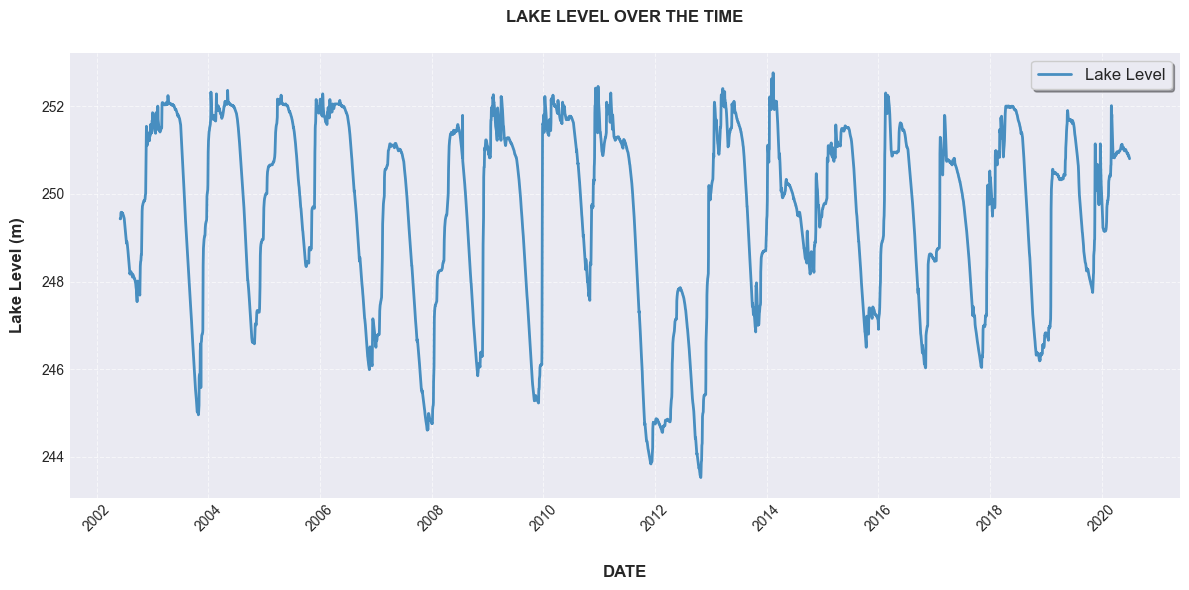

In [15]:
plt.style.use('seaborn-v0_8-darkgrid')

fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(df.index, df['Lake_Level'], label='Lake Level', color='#1f77b4', alpha=0.8, linewidth=2)

ax.set_xlabel('DATE', fontsize=12, fontweight='bold', labelpad=22)
ax.set_ylabel('Lake Level (m)', fontsize=12, fontweight='bold', labelpad=12)
ax.set_title('LAKE LEVEL OVER THE TIME', fontsize=12, fontweight='bold', pad=22)
ax.legend(loc='upper right', fontsize=12, frameon=True, shadow=True)
ax.grid(True, linestyle='--', alpha=0.6)

plt.xticks(rotation=45)

plt.tight_layout()

plt.show()



**Graph 1: LAKE LEVEL OVER TIME**

The first graph represents the variation in the **Lake Bilancino water level** over time.

**Key Observations**
- **Seasonal Pattern**: A cyclical variability is observed in the lake levels, with regular peaks and drops, suggesting a strong influence of seasonal factors such as **rainfall, evaporation, and water usage**.
- **Significant Fluctuations**: There are pronounced drops in certain periods (e.g., **2003-2004, 2007-2008, 2011-2012**), indicating that the lake experienced significant declines. This could be related to **droughts** or increased **water extraction**.
- **Water Level Recovery**: After each drastic drop, the lake level appears to recover relatively quickly, suggesting that the water source (likely rainfall or inflow from tributaries) is strong enough to restore it.
- **General Trend**: There is no clear long-term trend of a continuous decrease or increase in the lake level. Instead, a fluctuating pattern is observed.
- **Importance of Time Series Analysis**: This graph is useful to understand the behavior of the lake and can help predict future levels based on climatic and water consumption patterns.

<br>


<br>

- **GRAPH 2: PRECIPITATION TRENDS OVER TIME**

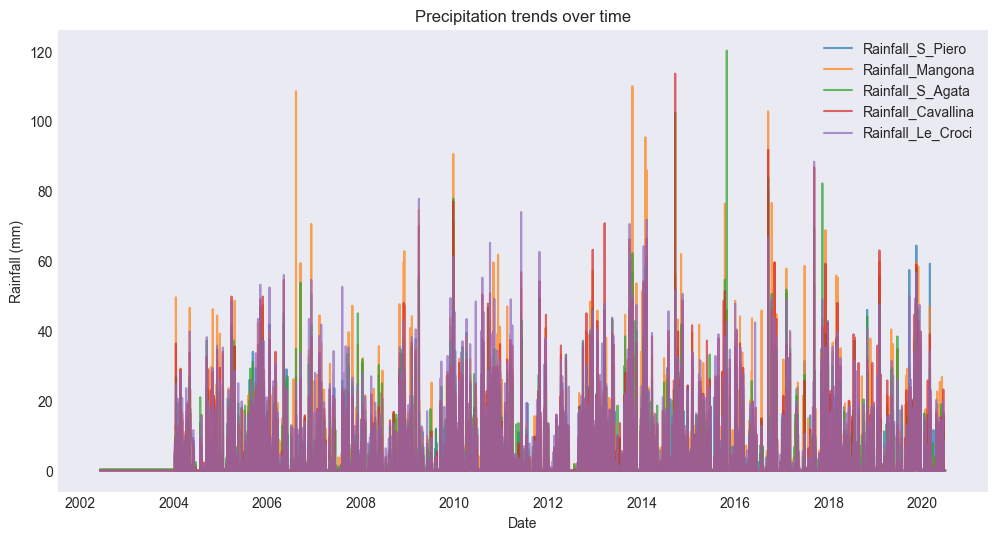

In [16]:
plt.figure(figsize=(12, 6))

for col in ['Rainfall_S_Piero', 'Rainfall_Mangona', 'Rainfall_S_Agata', 'Rainfall_Cavallina', 'Rainfall_Le_Croci']:
    plt.plot(df.index, df[col], label=col, alpha=0.7)

plt.xlabel('Date')
plt.ylabel('Rainfall (mm)')
plt.title('Precipitation trends over time')
plt.legend()
plt.grid()
plt.show()


**Graph 2: PRECIPITATION TRENDS OVER TIME**
The second graph shows the **rainfall trends** over time in different measurement stations near **Lake Bilancino**.

**Key Observations**
- **Variable Rainfall Pattern**: The amount of rainfall varies significantly over time, with **high peaks** in some years and **low precipitation periods** in others.
- **Relationship with the First Graph**: This graph is crucial for understanding lake level fluctuations. **Rainfall peaks likely contribute to increasing the lake level**, while **dry periods** could be linked to declines in water levels.
- **Years with Higher Precipitation**: Some years, such as **2014-2016**, show substantial rainfall peaks, which could explain lake level recovery in certain periods.
- **Differences Between Stations**: Although most stations follow similar patterns, some show **more extreme rainfall events** (e.g., *Rainfall_Mangona* in **2016**), suggesting **uneven rainfall distribution** in the region.
- **Seasonal Variability**: The density of the bars over time indicates **seasonal variations**, reinforcing the idea of a **climatic cycle affecting both rainfall and lake levels**.

<br>

<br>

- **GRAPH 3: LAKE LEVEL VS. RAINFALL OVER TIME**

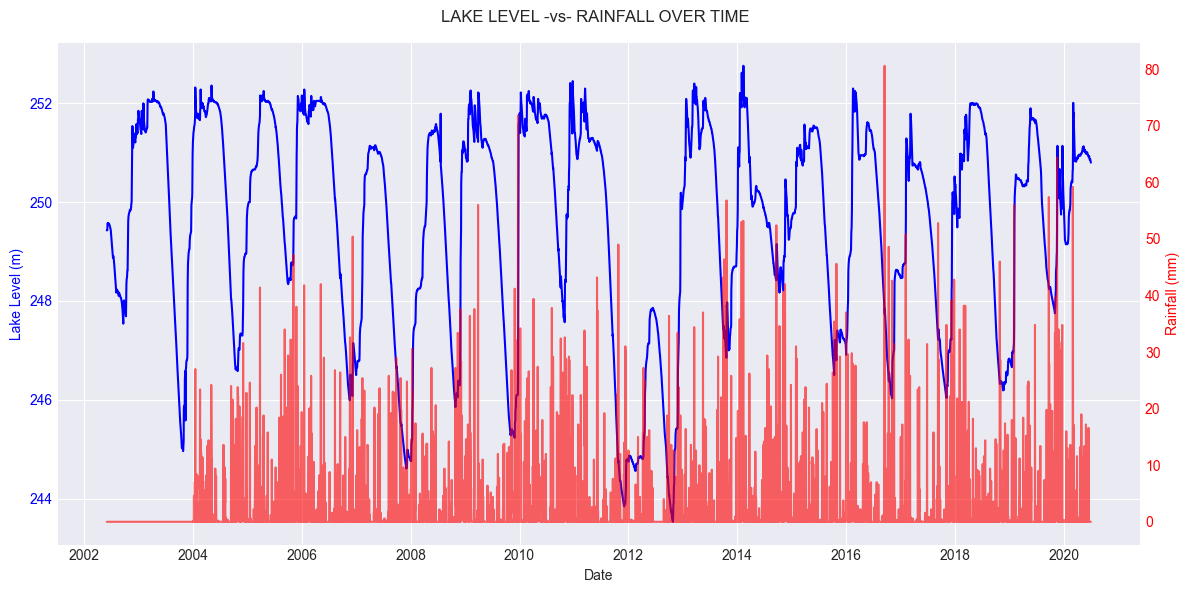

In [17]:
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.set_xlabel('Date')
ax1.set_ylabel('Lake Level (m)', color='blue')
ax1.plot(df.index, df['Lake_Level'], label='Lake Level', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.set_ylabel('Rainfall (mm)', color='red')
ax2.plot(df.index, df['Rainfall_S_Piero'], label='Rainfall S_Piero', color='red', alpha=0.6)
ax2.tick_params(axis='y', labelcolor='red')

fig.suptitle('LAKE LEVEL -vs- RAINFALL OVER TIME')
fig.tight_layout()
plt.grid()
plt.show()



**Graph 3:  LAKE LEVEL VS. RAINFALL OVER TIME**
The third graph combines both datasets, showing the relationship between **Lake Bilancino water level (blue line)** and **rainfall (red bars)** over time.

**Key Observations**
- **Correlation Between Rainfall and Lake Level**:
  - Rainfall peaks (**red bars**) tend to **precede an increase in the lake level** (**blue line**).
  - This indicates that **rain has a direct impact** on the water level, though with a slight **time lag** due to factors such as **drainage and soil absorption**.

- **Lake Level Declines**:
  - Periods of sharp **lake level drops** coincide with **low rainfall periods**.
  - This suggests that **evaporation, water consumption, or prolonged droughts** play a significant role in reducing the lake level.

- **Differences in Response Magnitude**:
  - In some years, **rainfall is high**, but the **lake level does not increase proportionally**.
  - This could be due to **additional factors**, such as **water drainage, human water use, or land permeability**.

- **Long-Term Trends**:
  - There is **no clear trend of continuous increase or decrease** in the lake level; rather, a **cyclical pattern** regulated by rainfall is observed.
  - However, some **low water level periods** (e.g., **2012**) coincide with more **irregular or reduced rainfall**.

<br>

The analysis of these graphs helps in understanding **how rainfall patterns influence lake levels**, providing insights for **water resource management** and potential **climate impact predictions**.

<br>

<br>

**4.4. CHECK FOR STATIONARITY**

- **ROLLING STATISTICS**: Observing `MEAN` and `VARIANCE` over time.

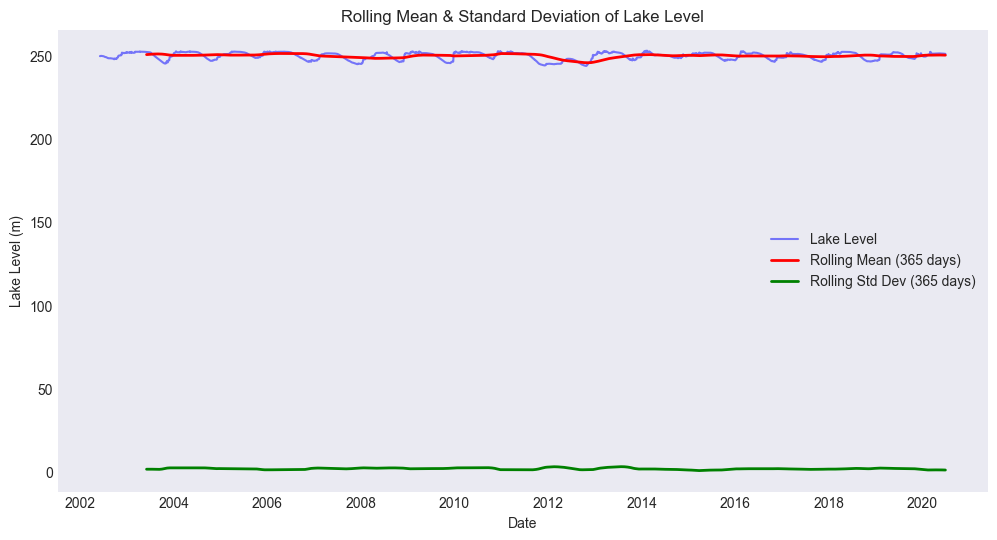

In [18]:
# Define rolling window size
window = 365  # One year for smoothing

# Calculate rolling mean and standard deviation
rolling_mean = df['Lake_Level'].rolling(window=window).mean()
rolling_std = df['Lake_Level'].rolling(window=window).std()

# Plot original time series with rolling statistics
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Lake_Level'], label='Lake Level', color='blue', alpha=0.5)
plt.plot(df.index, rolling_mean, label=f'Rolling Mean ({window} days)', color='red', linewidth=2)
plt.plot(df.index, rolling_std, label=f'Rolling Std Dev ({window} days)', color='green', linewidth=2)

plt.xlabel('Date')
plt.ylabel('Lake Level (m)')
plt.title('Rolling Mean & Standard Deviation of Lake Level')
plt.legend()
plt.grid()
plt.show()


**ANALYSIS OF THE GRAPH - ROLLING MEAN AND STANDARD DEVIATION OF LAKE LEVEL**

This graph shows the **Lake Bilancino level (blue), the 365-day rolling mean (red), and the 365-day rolling standard deviation (green)**. Based on this visualization, we can derive the following key points:

1. **Stability of the Lake Level**  
   - The blue line, representing the lake level, shows slight oscillations but generally **remains within a stable range** throughout the observed period.  
   - There is no clear trend of long-term increase or decrease in the lake level.

2. **Smoothed Trend with Rolling Mean**  
   - The red line represents the **365-day rolling mean**, which helps smooth seasonal fluctuations and provides a clearer view of the overall trend.  
   - The rolling mean closely follows the blue line, confirming that despite temporary variations, **the average lake level remains relatively constant**.

3. **Low Variability in Standard Deviation**  
   - The green line represents the **365-day rolling standard deviation**, indicating how much the lake level varies relative to its mean.  
   - It remains very low throughout the period, suggesting that **variations in lake level are minimal in the long term**.

4. **Relation to Previous Graphs**  
   - Previous graphs showed significant short-term fluctuations, but this graph confirms that **in the long term, the lake level remains within a controlled range**.  
   - This could be due to a balance between **precipitation, evaporation, and water management in the region**.

**Conclusion**  
The level of **Lake Bilancino experiences temporary fluctuations**, but the rolling mean suggests **long-term stability**. The low standard deviation confirms that variations are not extreme, indicating a **relatively stable hydrological system**.


<br>

<br>

- **AUGMENTED DICKEY-FULLER (ADF) Test**: STATISTICAL CHECK FOR STATIONARITY

    - The **ADF test** checks whether the time series is stationary or non-stationary by testing for the presence of a unit root.

    - ADF test results will confirm whether Lake_Level is stationary or non-stationary based on the p-value:

        - **p-value < 0.05** → Stationary ✅
        - **p-value ≥ 0.05** → Non-Stationary (Requires Differencing or Transformations) ⚠️


In [19]:
# Perform ADF test
adf_test = adfuller(df['Lake_Level'])

# Print results
print("Augmented Dickey-Fuller Test Results:")
print(f"ADF Statistic: {adf_test[0]}")
print(f"p-value: {adf_test[1]}")
print(f"Critical Values: {adf_test[4]}")

# Interpretation
if adf_test[1] < 0.05:
    print("✅ The time series is stationary (p-value < 0.05). No transformation needed.")
else:
    print("⚠️ The time series is non-stationary (p-value ≥ 0.05). Consider differencing or transformations.")


Augmented Dickey-Fuller Test Results:
ADF Statistic: -6.880991194599793
p-value: 1.4336336890493292e-09
Critical Values: {'1%': np.float64(-3.4313461714566476), '5%': np.float64(-2.8619802231867366), '10%': np.float64(-2.567004327355685)}
✅ The time series is stationary (p-value < 0.05). No transformation needed.


**Analysis of Augmented Dickey-Fuller (ADF) Test Results**

The **Augmented Dickey-Fuller (ADF) Test** is used to determine whether a time series is stationary or not. Based on the obtained results, we can draw the following conclusions:

1. **ADF Statistic and p-value**  
   - The **ADF statistic** is **-6.88**, a significantly low value.  
   - The **p-value** is **1.43e-09**, which is **much smaller than 0.05**.

2. **Critical Values**  
   - For significance levels of **1%, 5%, and 10%**, the critical values are **-3.43, -2.86, and -2.56**, respectively.  
   - Since the **ADF statistic is lower than all critical values**, the null hypothesis of non-stationarity is rejected.

3. **Interpretation of the Results**  
   - **Since the p-value is below 0.05**, the time series is considered **stationary**.  
   - This means that **no additional transformation** (such as differencing or logarithmic transformation) is required to stabilize the variance or make the series more predictable.

4. **Relation to Previous Analyses**  
   - This result reinforces the previous analysis regarding the **long-term stability** of Lake Bilancino's water level.  
   - While short-term fluctuations exist, the overall structure of the time series remains stable over time.

**Conclusion**  
The time series of the lake level is **stationary**, indicating that its statistical behavior does not significantly change over time. This is a key factor for predictive modeling, as it allows the application of time series models without requiring additional transformations.

<br>


<br>

**4.5.ANALYZE CORRELATIONS BETWEEN FEATURES**

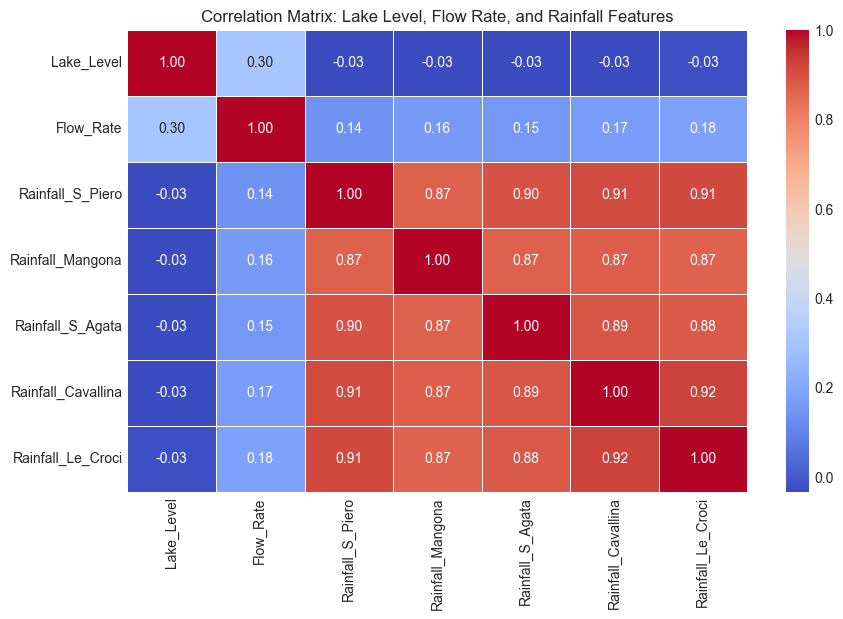

In [20]:
# Compute correlation matrix
correlation_matrix = df[['Lake_Level', 'Flow_Rate', 'Rainfall_S_Piero', 'Rainfall_Mangona', 
                         'Rainfall_S_Agata', 'Rainfall_Cavallina', 'Rainfall_Le_Croci']].corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix: Lake Level, Flow Rate, and Rainfall Features")
plt.show()


**Analysis of the Correlation Matrix**

The correlation matrix measures the relationship between different variables associated with **Lake Bilancino's water level, flow rate, and precipitation at different stations**. Based on this matrix, the following key points can be highlighted:

1. **Correlation Between Lake Level and Other Variables**  
   - The **lake level (Lake_Level)** shows a **low correlation with all variables**, with values close to **-0.03** for precipitation and **0.30** with the **flow rate (Flow_Rate)**.
   - This suggests that, **in the short term**, precipitation does not have an immediate impact on the lake level, possibly due to delays in water infiltration or reservoir regulation.

2. **Relationship Between Flow Rate and Precipitation**  
   - The **flow rate (Flow_Rate)** has a **weak positive correlation** with precipitation (values between **0.14 and 0.18**).
   - This indicates that the water flow in the region may depend on other factors such as **evaporation, water extraction, or reservoir regulation**.

3. **Strong Correlation Between Rainfall Stations**  
   - A **very high correlation (≥0.87)** is observed between the different precipitation stations, indicating that rainfall is **similarly distributed across all measured areas**.
   - The highest correlation is found between **Rainfall_Cavallina and Rainfall_Le_Croci (0.92)**, suggesting that these locations experience **almost identical precipitation patterns**.

4. **Possible Implications**  
   - The **low correlation between rainfall and lake level** suggests that further studies are needed to evaluate **delays in the lake's response to precipitation**.
   - The **high correlation between rainfall stations** confirms that precipitation patterns are **consistent across the region**.
   - The fact that the **flow rate has a higher correlation with the lake level** than rainfall suggests that **water movement within the lake is a more relevant factor in its level** than the amount of rain received at a specific moment.

**Conclusion**  
The correlation matrix analysis indicates that **Lake Bilancino's water level is not strongly influenced by precipitation in the short term** but depends more on the **flow rate and other hydrological factors**. The precipitation patterns in the region are **consistent**, which could enable **predictive modeling based on more detailed hydrological models**.

<br>

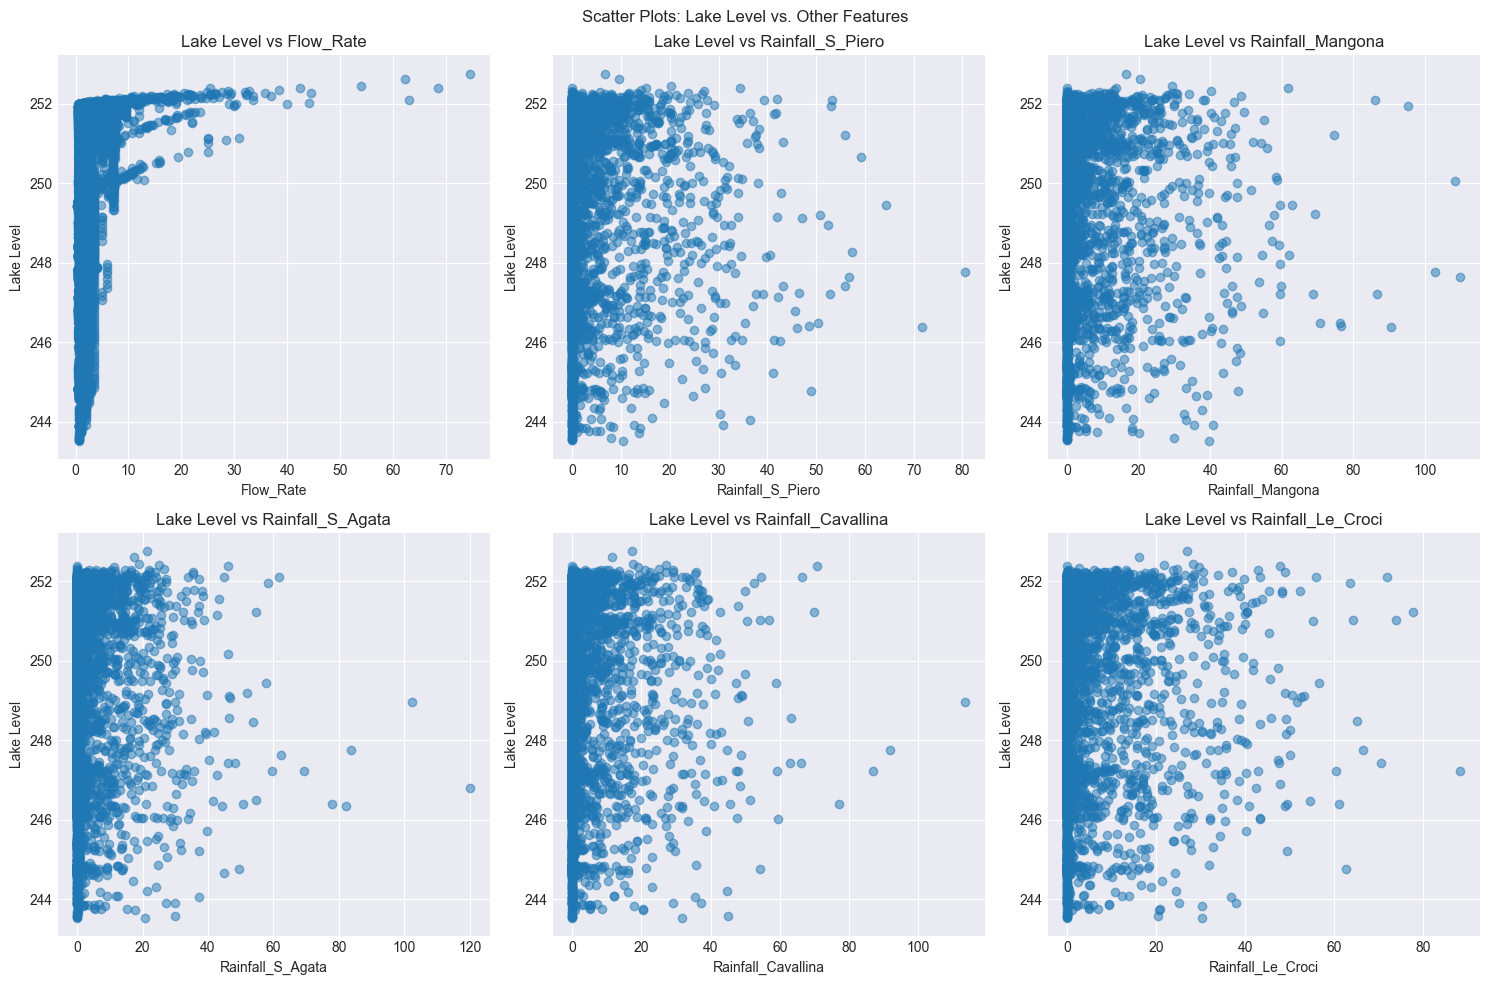

In [21]:
# Define features for scatter plots
features = ['Flow_Rate', 'Rainfall_S_Piero', 'Rainfall_Mangona', 'Rainfall_S_Agata', 'Rainfall_Cavallina', 'Rainfall_Le_Croci']

# Generate scatter plots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle("Scatter Plots: Lake Level vs. Other Features")

for i, feature in enumerate(features):
    row, col = divmod(i, 3)
    axes[row, col].scatter(df[feature], df['Lake_Level'], alpha=0.5)
    axes[row, col].set_xlabel(feature)
    axes[row, col].set_ylabel("Lake Level")
    axes[row, col].set_title(f"Lake Level vs {feature}")

plt.tight_layout()
plt.show()


**Analysis of Scatter Plots: Lake Level vs. Other Variables**

The graphs show the relationship between **Lake Bilancino's water level** and different variables, such as **flow rate (Flow_Rate)** and **precipitation at different stations**.

1. **Relationship Between Lake Level and Flow Rate (Top Left Graph)**
    - A **non-linear relationship** is observed where the lake level tends to stabilize at high values (**around 252 m**) when the flow rate increases.
    - For low **Flow_Rate** values, there is greater dispersion in lake levels, suggesting that other factors also influence water level variability.

2. **Relationship Between Lake Level and Precipitation (Other Graphs)**
    - All scatter plots showing the **lake level vs. precipitation** exhibit a **weak or nonexistent trend**.
    - Most data points are concentrated at **low precipitation values (between 0 and 20 mm)**, indicating that extreme rainfall events are relatively rare.
    - Even in **high precipitation events (above 60 mm)**, there is no clear increase in lake level.
    - This reinforces the previous observation that **precipitation does not have an immediate impact on lake level**, possibly due to **delays in water absorption, reservoir management, or contributions from other water sources**.




3. **Comparison with the Correlation Matrix**
    - These scatter plots visually confirm the **low correlation** observed in the matrix between lake level and precipitation (**values around -0.03**).
    - Although some relationship was expected, these results confirm that **precipitation alone does not explain lake level variations**.

**Conclusion**
The scatter plots reinforce the finding that **Lake Bilancino’s water level is more influenced by flow rate than by immediate precipitation**. While rainfall is an important factor in the **hydrological cycle**, its impact on lake level appears to depend on **drainage time, water management, and evaporation**.




<br>

**4.6. IDENTIFY SEASONALITY AND CYCLIC PATTERNS**

**4.6.1. TIME SERIES DECOMPOSITION (TREND, SEASONALITY, AND RESIDUALS)**

We will use seasonal decomposition to break Lake_Level into:

- **Trend** → The overall long-term increase or decrease.
- **Seasonality** → Repeating patterns, such as yearly or monthly cycles.
- **Residuals** → The unexplained variations after removing trend and seasonality.

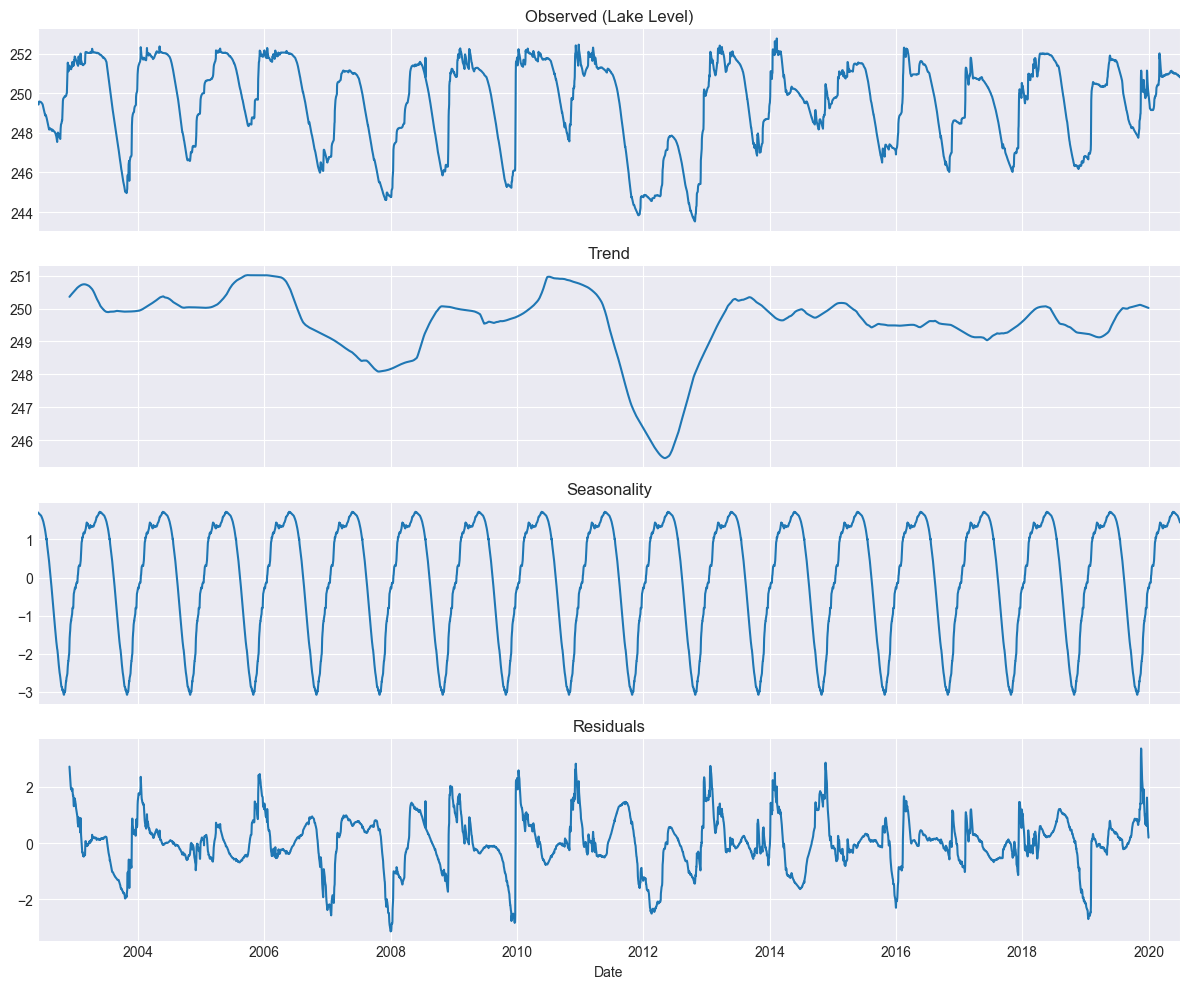

In [22]:
# Perform seasonal decomposition (assume daily data)
decomposition = seasonal_decompose(df['Lake_Level'], model='additive', period=365)

# Plot decomposition components
fig, axes = plt.subplots(4, 1, figsize=(12, 10), sharex=True)
decomposition.observed.plot(ax=axes[0], title="Observed (Lake Level)")
decomposition.trend.plot(ax=axes[1], title="Trend")
decomposition.seasonal.plot(ax=axes[2], title="Seasonality")
decomposition.resid.plot(ax=axes[3], title="Residuals")

plt.xlabel("Date")
plt.tight_layout()
plt.show()


**Analysis of the Time Series Decomposition of Lake Bilancino's Water Level**

This graph presents the **time series decomposition** of Lake Bilancino's water level into its main components: **trend, seasonality, and residuals**. Based on this visualization, the following key points can be highlighted:

1. **Observed Component (Original Series)**
    - The original time series shows an **oscillatory and recurring pattern**, with periodic increases and decreases in lake levels.
    - There are **regular fluctuations**, suggesting a **cyclical pattern** in water level variations.

2. **Trend**
    - A **long-term pattern** is visible, where the lake level experiences a significant drop during certain periods, such as around **2011-2012**, followed by a gradual recovery.
    - While there are some oscillations in the trend, overall, the lake level remains **relatively stable in the long run**.
    - These changes may be influenced by **climatic events, water management policies, or prolonged droughts**.

3. **Seasonality**
    - The seasonal component reveals a **recurring pattern**, indicating that the lake level follows a **predictable annual or multi-annual cycle**.
    - This reinforces previous findings that the lake level is influenced by **climatic and seasonal factors**, such as **rainfall and evaporation**.

4. **Residuals**
    - The residuals represent variations **not explained** by trend or seasonality.
    - These values do not follow a clear pattern, but **spikes occur in certain periods**, suggesting the presence of **anomalous events or external influences** on the time series.
    - This could be due to **extreme weather events, human interventions in reservoir management, or irregular hydrological occurrences**.

**Conclusion**
The time series decomposition confirms that **Lake Bilancino’s water level exhibits a well-defined seasonal behavior and a relatively stable long-term trend**. However, some **anomalous events appear in the residuals**, suggesting that, in addition to precipitation and water flow, **other factors affect the lake’s dynamics**.

<br>


<br>

**4.6.2. CHECKING SEASONAL EFFECTS IN RAINFALL TRENDS**

- We also need to **analyze rainfall trends** to see if seasonality in precipitation aligns with lake level changes.

- We chose `Rainfall_S_Piero` because it's one of the rainfall variables, and analyzing one station is a quick way to check seasonality trends without overloading the decomposition process. If patterns are found, we can extend the analysis to other rainfall stations. 

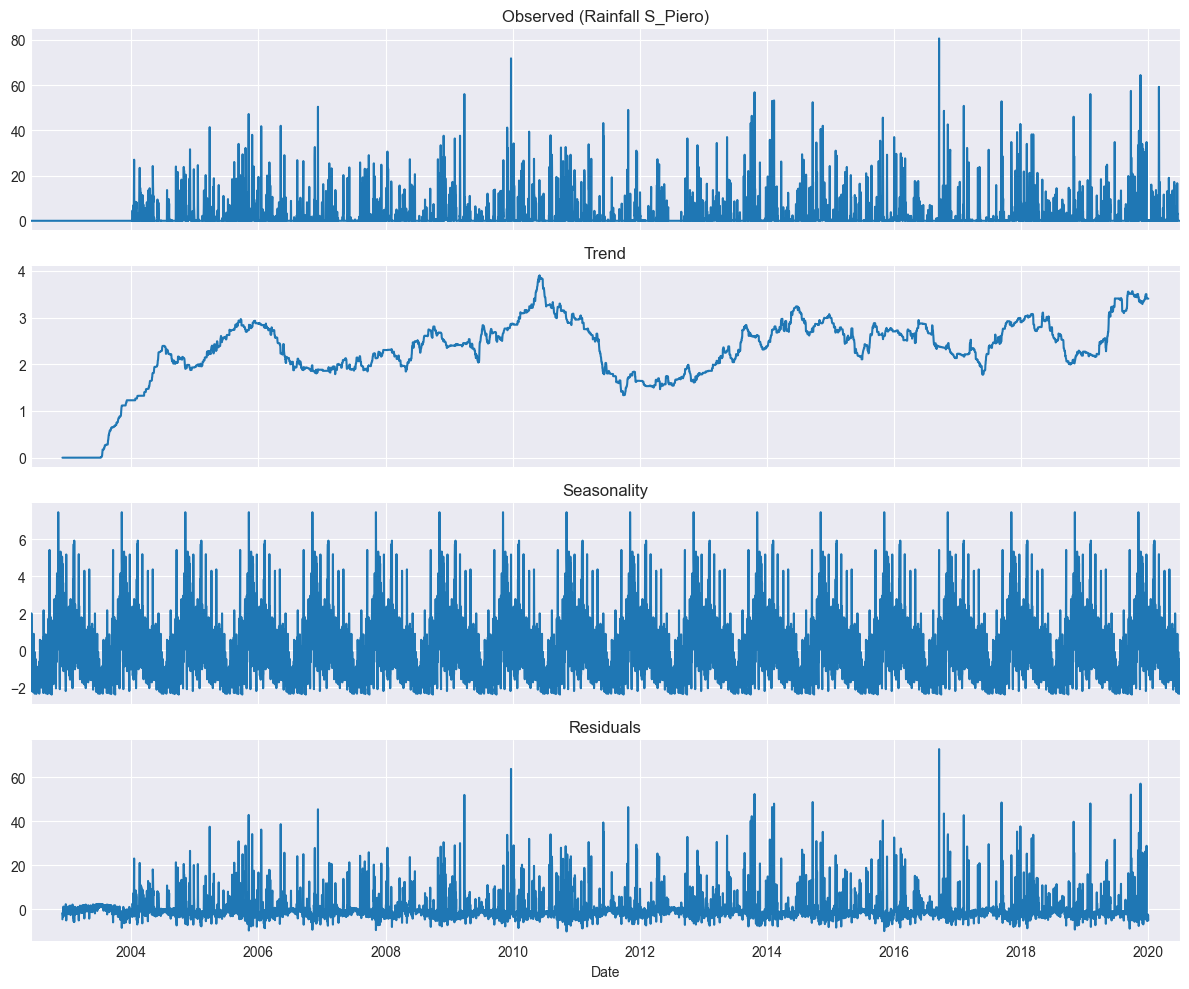

In [23]:
# Perform decomposition on one of the rainfall features
rainfall_decomposition = seasonal_decompose(df['Rainfall_S_Piero'].fillna(0), model='additive', period=365)

# Plot decomposition for rainfall
fig, axes = plt.subplots(4, 1, figsize=(12, 10), sharex=True)
rainfall_decomposition.observed.plot(ax=axes[0], title="Observed (Rainfall S_Piero)")
rainfall_decomposition.trend.plot(ax=axes[1], title="Trend")
rainfall_decomposition.seasonal.plot(ax=axes[2], title="Seasonality")
rainfall_decomposition.resid.plot(ax=axes[3], title="Residuals")

plt.xlabel("Date")
plt.tight_layout()
plt.show()


# **Analysis of the Time Series Decomposition of Rainfall in S. Piero**

This graph presents the **time series decomposition of precipitation in the S. Piero station**, dividing the series into its fundamental components: **observed, trend, seasonality, and residuals**. Based on this visualization, the following key points can be highlighted:

1. **Observed Component (Original Series)**
    - **High fluctuations in precipitation values** are observed, with intense rainfall events occurring in multiple periods.
    - The distribution is **irregular**, suggesting **significant variations** in rainfall amounts over time.

2. **Trend**
    - There is an **upward trend from 2002 to 2007**, followed by **a stable period with fluctuations**.
    - After **2012**, the trend shows **a slight recovery** after a decline, indicating possible **climatic pattern changes**.
    - The variability in the trend suggests that **precipitation in the region is not completely stable in the long term**.

3. **Seasonality**
    - The seasonal component shows **regular oscillations**, indicating that precipitation follows a **predictable cycle**.
    - The recurrence of peaks reinforces the hypothesis that **rainfall is influenced by climatic seasons or recurring meteorological patterns**.

4. **Residuals**
    - The residuals exhibit **high dispersion**, indicating the presence of **extreme rainfall events or climatic anomalies** not explained by the trend or seasonality.
    - Peaks are visible in certain years, such as **2010, 2014, and 2016**, which could be associated with **storms or abrupt weather changes**.

**Comparison with the Lake Level Series**
    - Unlike the lake level series, precipitation exhibits **greater variability and extreme events**, which explains why **there is no immediate strong correlation between rainfall and lake level**.
    - The seasonal pattern indicates that **rainfall occurs cyclically**, but its impact on the lake may depend on additional factors such as **drainage capacity, evaporation, and reservoir retention**.

**Conclusion**
The **rainfall time series in S. Piero** exhibits **a strong seasonal component and high variability over time**, with **extreme events** that may affect lake level dynamics. However, the relationship between both variables is not immediate, suggesting the need to analyze **additional factors such as infiltration time and reservoir management**.

<br>


<br>

**4.7. DETECT AND HANDLE OUTLIERS**

**4.7.1. Detecting Outliers using Boxplots**
- Boxplots help visually identify extreme values in `Lake_Level` and `Rainfall`.

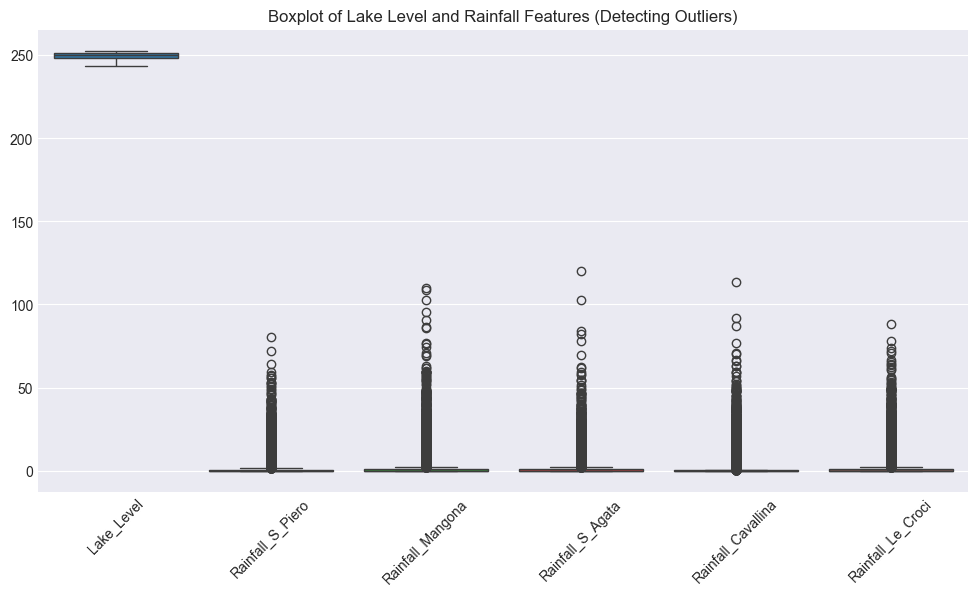

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define features to check for outliers
features = ['Lake_Level', 'Rainfall_S_Piero', 'Rainfall_Mangona', 
            'Rainfall_S_Agata', 'Rainfall_Cavallina', 'Rainfall_Le_Croci']

# Create boxplots
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[features])
plt.xticks(rotation=45)
plt.title("Boxplot of Lake Level and Rainfall Features (Detecting Outliers)")
plt.show()


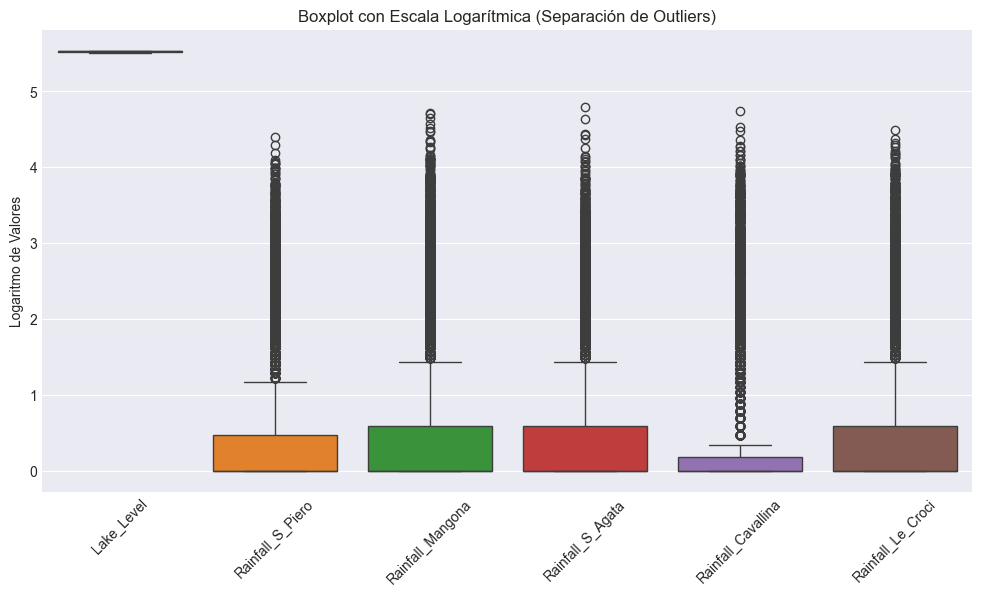

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Definir características a analizar
features = ['Lake_Level', 'Rainfall_S_Piero', 'Rainfall_Mangona', 
            'Rainfall_S_Agata', 'Rainfall_Cavallina', 'Rainfall_Le_Croci']

# Aplicar transformación logarítmica para visualizar mejor los outliers
df_log = np.log1p(df[features])  # log1p(x) = log(1 + x) evita problemas con ceros

# Crear el gráfico de boxplot con escala logarítmica
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_log)
plt.xticks(rotation=45)
plt.title("Boxplot con Escala Logarítmica (Separación de Outliers)")
plt.ylabel("Logaritmo de Valores")
plt.show()


**4.7.2. Identifying Outliers Using IQR (Interquartile Range)**
- IQR helps detect extreme values mathematically.

In [26]:
import numpy as np

# Function to detect outliers based on IQR
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)  # First quartile (25%)
    Q3 = df[column].quantile(0.75)  # Third quartile (75%)
    IQR = Q3 - Q1  # Interquartile range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Count and display outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    print(f"🔍 {column}: {len(outliers)} outliers detected")

# Apply outlier detection to each feature
for feature in features:
    detect_outliers(df, feature)


🔍 Lake_Level: 0 outliers detected
🔍 Rainfall_S_Piero: 1331 outliers detected
🔍 Rainfall_Mangona: 1360 outliers detected
🔍 Rainfall_S_Agata: 1270 outliers detected
🔍 Rainfall_Cavallina: 1518 outliers detected
🔍 Rainfall_Le_Croci: 1350 outliers detected


**4.7.3. Handling Outliers**

- Based on the high number of detected outliers in rainfall variables and their distribution in the boxplot with a logarithmic scale, we used `Winsorization`.

Whythis technique?

- ✔ **Too many outliers to remove** – More than 1,000 outliers per feature means that removing them would lead to significant data loss.

- ✔ **Likely real extreme events** – Rainfall data often has high variability, and extreme values may represent actual heavy rain periods.

- ✔ **Capping preserves data trends** – By setting extreme values to the upper and lower IQR bounds, we reduce distortion while keeping useful information.




In [29]:
# Cap extreme values for all features
for feature in features:
    Q1, Q3 = df[feature].quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[feature] = np.where(df[feature] > upper_bound, upper_bound, df[feature])
    df[feature] = np.where(df[feature] < lower_bound, lower_bound, df[feature])


In [ ]:
# Define function to cap outliers using IQR method
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)  # First quartile (25%)
    Q3 = df[column].quantile(0.75)  # Third quartile (75%)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Apply capping (Winsorization)
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])

# Apply capping to all rainfall features
rainfall_features = ['Rainfall_S_Piero', 'Rainfall_Mangona', 'Rainfall_S_Agata', 
                     'Rainfall_Cavallina', 'Rainfall_Le_Croci']

for feature in rainfall_features:
    cap_outliers(df, feature)


In [31]:
# Check if outliers are capped properly
for feature in rainfall_features:
    detect_outliers(df, feature)  # Reuse the previously defined function to detect outliers


🔍 Rainfall_S_Piero: 0 outliers detected
🔍 Rainfall_Mangona: 0 outliers detected
🔍 Rainfall_S_Agata: 0 outliers detected
🔍 Rainfall_Cavallina: 0 outliers detected
🔍 Rainfall_Le_Croci: 0 outliers detected


- **Updated Boxplot to Confirm Changes**

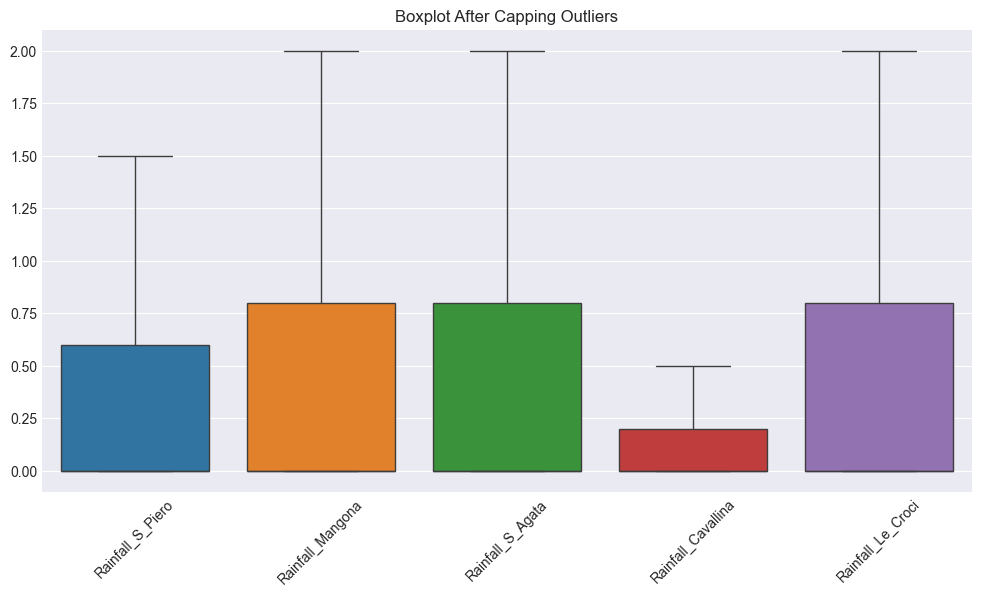

In [ ]:
# Plot updated boxplots
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[rainfall_features])
plt.xticks(rotation=45)
plt.title("Boxplot After Capping Outliers")
plt.show()


<br>

**4.8. EXPLORE LAG EFFECTS**

<Figure size 1000x500 with 0 Axes>

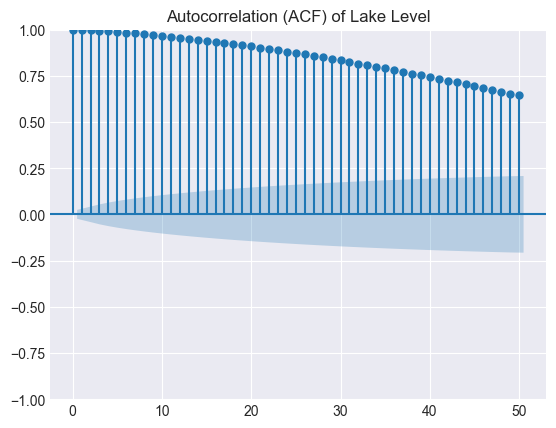

In [ ]:
# Plot ACF for Lake Level
plt.figure(figsize=(10, 5))
plot_acf(df['Lake_Level'], lags=50)  # Adjust lags if needed
plt.title("Autocorrelation (ACF) of Lake Level")
plt.show()


**Analysis of the Autocorrelation (ACF) of Lake Bilancino's Water Level**

The **Autocorrelation Function (ACF) plot** shows how past values of Lake Bilancino's water level are correlated with present values at different lags. Based on this visualization, the following key conclusions can be drawn:

1. **High Persistence in Autocorrelation**
    - The first lags exhibit **autocorrelation close to 1**, indicating that the lake level on a given day is **strongly related to previous days**.
    - This high persistence confirms that the lake level follows **an inertial behavior**, meaning that changes are gradual rather than abrupt.

2. **Gradual Decline in Correlation**
    - As the lag increases, the autocorrelation **gradually decreases** but remains positive up to approximately lag 50.
    - This suggests that the lake level **retains memory of its state over long periods**, which is expected in large bodies of water where volume changes occur progressively.

3. **No Clear Cycles in Autocorrelation**
    - No abrupt changes or significant oscillations are observed in autocorrelation, suggesting that the **lake level does not follow a strictly periodic pattern in the short term**.
    - This is consistent with previous analyses, where **annual seasonality** was identified, but the retained water smooths these fluctuations over time.

4. **Relation to Seasonality and Trend**
    - The fact that autocorrelation remains high even at long lags indicates that **the lake level is influenced by past events over extended periods**.
    - This reinforces the need to consider predictive models that incorporate multiple lags or approaches such as **ARIMA models or long-memory models**.

**Conclusion**
The **Lake Bilancino water level exhibits high and persistent autocorrelation**, indicating that its behavior is highly dependent on previous values. This suggests that **forecasting models should consider extended periods of historical data to accurately capture its future evolution**.


<Figure size 1000x500 with 0 Axes>

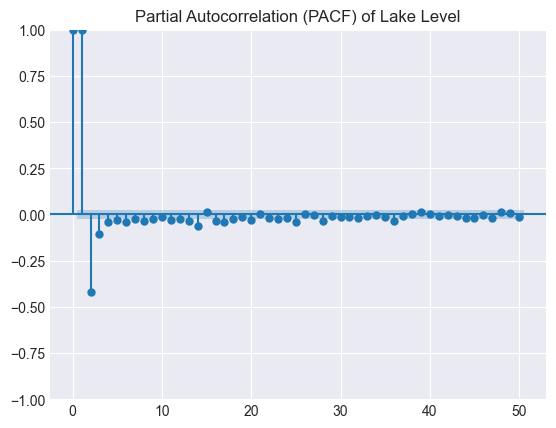

In [ ]:
# Plot PACF for Lake Level
plt.figure(figsize=(10, 5))
plot_pacf(df['Lake_Level'], lags=50)  # Adjust lags if needed
plt.title("Partial Autocorrelation (PACF) of Lake Level")
plt.show()


**Analysis of the Partial Autocorrelation (PACF) of Lake Bilancino's Water Level**

The **Partial Autocorrelation Function (PACF) plot** helps identify **which lags (past values) have a direct influence on Lake Bilancino's level**, removing the effects of intermediate lags. Based on this analysis, the following key conclusions can be drawn:

1. **High Correlation in the First Lags**
    - A **strong correlation is observed in the first two lags**, indicating that the lake level on a given day **is primarily influenced by the values of the immediately preceding days**.
    - This pattern is typical in **autoregressive (AR) processes**, where recent values have the greatest impact on predicting the next value.

2. **Rapid Decline in Autocorrelation**
    - After the first few lags, the partial autocorrelation **drops sharply and remains close to zero**, suggesting that older values **have little or no direct influence** on the lake level when intermediate effects are accounted for.
    - This implies that a forecasting model could **rely on just a few autoregressive (AR) terms** to capture the lake’s dynamics.

3. **Presence of a Negative Lag**
    - A **negative lag around the third period** is observed, which may indicate a corrective effect in the lake level after abrupt changes in the preceding days.
    - This suggests that in certain cases, if there is a sudden drop or rise in the lake level, **there may be a slight tendency to compensate for this change in the following days**.

4. **Comparison with the Full Autocorrelation (ACF)**
    - Unlike the **ACF plot**, where autocorrelation gradually decreases over time, the **PACF shows that only the first lags are significant**.
    - This reinforces the idea that the **lake level is strongly dependent on its recent values rather than distant past values**.

**Conclusion**
The **Lake Bilancino water level follows a low-order autoregressive process**, where the most recent values (**especially the first two lags**) are the most important for predicting future water levels. This finding is crucial for building efficient forecasting models, as it suggests that **only a few AR terms are needed** to capture the lake’s dynamics.


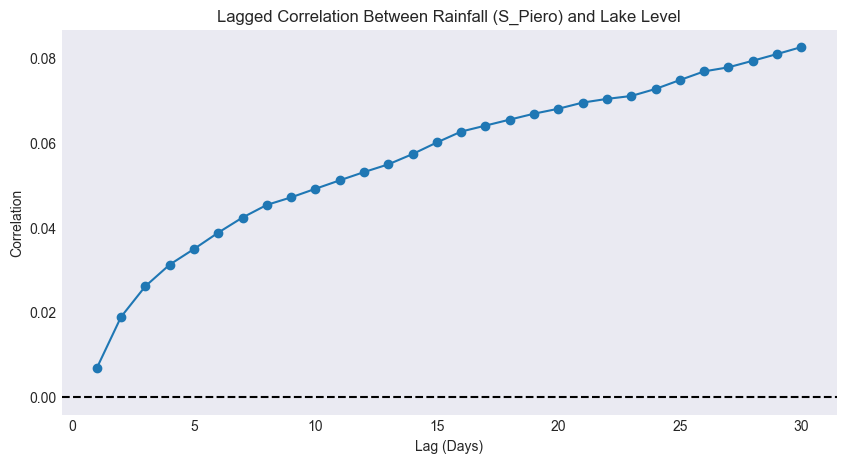

In [35]:
# Define maximum lag days to test
max_lag = 30

# Create a DataFrame to store correlations
lagged_corrs = pd.DataFrame()

# Compute correlation for each lag
for lag in range(1, max_lag + 1):
    lagged_corrs.loc[lag, 'Correlation'] = df['Lake_Level'].corr(df['Rainfall_S_Piero'].shift(lag))

# Plot correlation between rainfall and lake level at different lags
plt.figure(figsize=(10, 5))
plt.plot(lagged_corrs.index, lagged_corrs['Correlation'], marker='o')
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel("Lag (Days)")
plt.ylabel("Correlation")
plt.title("Lagged Correlation Between Rainfall (S_Piero) and Lake Level")
plt.grid()
plt.show()


**Analysis of Lagged Correlation Between Rainfall (S_Piero) and Lake Bilancino Level**

The graph shows the **correlation between rainfall at the S_Piero station and Lake Bilancino's water level at different time lags**. Based on this visualization, the following key conclusions can be drawn:

1. **Weak but Increasing Relationship**
  - In the first few days, the correlation between rainfall and lake level is **very low**, close to **0.01 or less**.
  - However, the correlation **gradually increases over time**, reaching **values around 0.08 at a 30-day lag**.

2. **Delayed Response of the Lake to Rainfall**
  - The progressive increase in correlation suggests that rainfall **does not immediately impact lake levels**, but rather, there is a **delayed hydrological response**.
  - This delay may be due to factors such as:
    - **Delayed infiltration and runoff**, where rainwater takes time to reach the lake via rivers and aquifers.
    - **Reservoir regulation**, as inflows and outflows may be artificially controlled.
    - **Evaporation and soil absorption**, which can reduce the volume of water that ultimately reaches the lake.

3. **Lack of Strong Correlation**
- Despite the gradual increase, the **maximum correlation value (~0.08)** remains **low**, indicating that rainfall at S_Piero **is not a direct determining factor** of lake levels.
- This aligns with previous findings in the **correlation matrix**, where the relationship between rainfall and lake level was nearly negligible at an immediate level.

**Conclusion**
The impact of rainfall on **Lake Bilancino’s water level is delayed and weak**, with correlation **slowly increasing up to 30 days**, but without reaching significant values. This suggests that other factors, such as **river inflows, reservoir management, and evaporation**, play a more important role in the lake’s dynamics.
